In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:

from sklearn.preprocessing import LabelEncoder



# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to the specific column
df['Extracurricular Activities'] = encoder.fit_transform(df['Extracurricular Activities'])


df.head()

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [9]:
df.skew()

Hours Studied                      -0.004213
Previous Scores                     0.004502
Extracurricular Activities          0.020804
Sleep Hours                        -0.039474
Sample Question Papers Practiced   -0.035636
Performance Index                  -0.001740
dtype: float64

In [10]:


from scipy.stats import zscore

# Specify the columns for outlier detection
columns_to_check = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced',  
                    'Performance Index']

# Apply Z-score only to the selected columns
z_scores = df[columns_to_check].apply(zscore)

# Define the threshold for outlier detection
threshold = 3

# Identify rows with outliers in the selected columns
outliers = (z_scores.abs() > threshold).any(axis=1)

# Display rows with outliers
outlier_rows = df[outliers]
print("Outlier Rows:")
outlier_rows.shape


Outlier Rows:


(0, 6)

In [11]:
df_cleaned=df

In [12]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Get the correlation with respect to 'median_house_value'
correlation_with_Performance_Index = correlation_matrix['Performance Index']

# Print the correlation values
print("Correlation with respect to 'Performance Index':")
print(correlation_with_Performance_Index)


Correlation with respect to 'Performance Index':
Hours Studied                       0.373730
Previous Scores                     0.915189
Extracurricular Activities          0.024525
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64


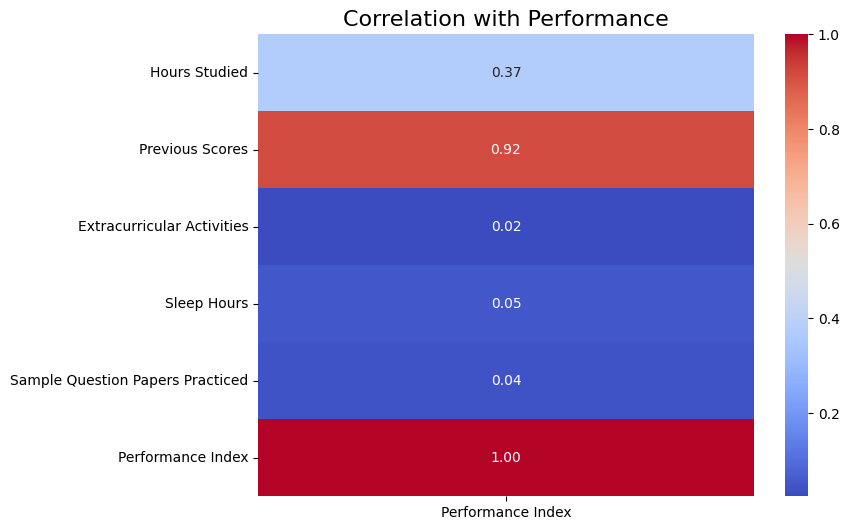

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Focus on correlations with 'price'
Performance_correlation = correlation_matrix[['Performance Index']]

# Create a heatmap for 'price' correlations
plt.figure(figsize=(8, 6))
sns.heatmap(Performance_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add labels and title
plt.title("Correlation with Performance", fontsize=16)
plt.show()


In [14]:
# Define the independent features (X) and target (y)
X = df_cleaned.drop(columns=['Performance Index'])  # Drop the 'price' column
y = df_cleaned['Performance Index']  # 'price' is the target variable


In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train, y_train)

LinearRegression()

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions (no log transformation here)
y_pred = model.predict(X_test)

# Evaluate performance in the original scale (no need for np.exp here)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Original Scale): {mse}")
print(f"R-squared (Original Scale): {r2}")


Mean Squared Error (Original Scale): 4.082628398521854
R-squared (Original Scale): 0.9889832909573145


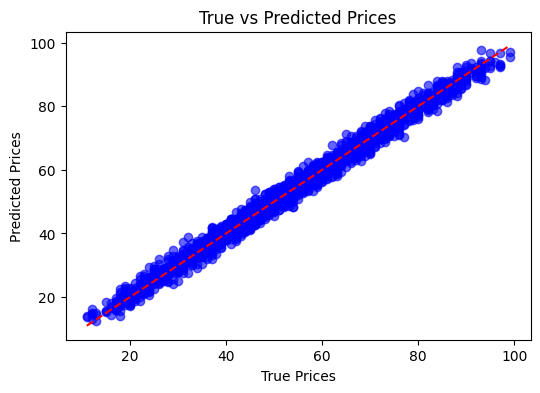

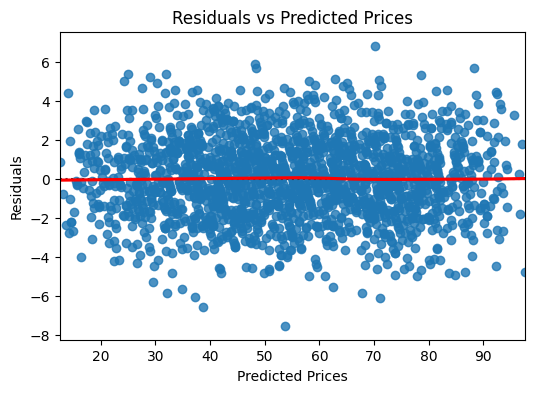

In [22]:
# Scatter plot of true vs predicted prices
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()

# Residuals plot (difference between actual and predicted prices)
plt.figure(figsize=(6, 4))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()


In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Convert data to NumPy arrays if not already
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42, tree_method="hist")

# Fit the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict using each model
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluate each model
lr_mse = mean_squared_error(y_test, lr_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# Print results
print("Model Performance Comparison:")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R²: {lr_r2:.2f}")
print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")
print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}")


Model Performance Comparison:
Linear Regression - MSE: 4.08, R²: 0.99
Random Forest - MSE: 5.16, R²: 0.99
XGBoost - MSE: 4.93, R²: 0.99
